<a href="https://colab.research.google.com/github/dorelysm/AI_practices/blob/main/Linear_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression exercise using California housing prices dataset https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [1]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [2]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

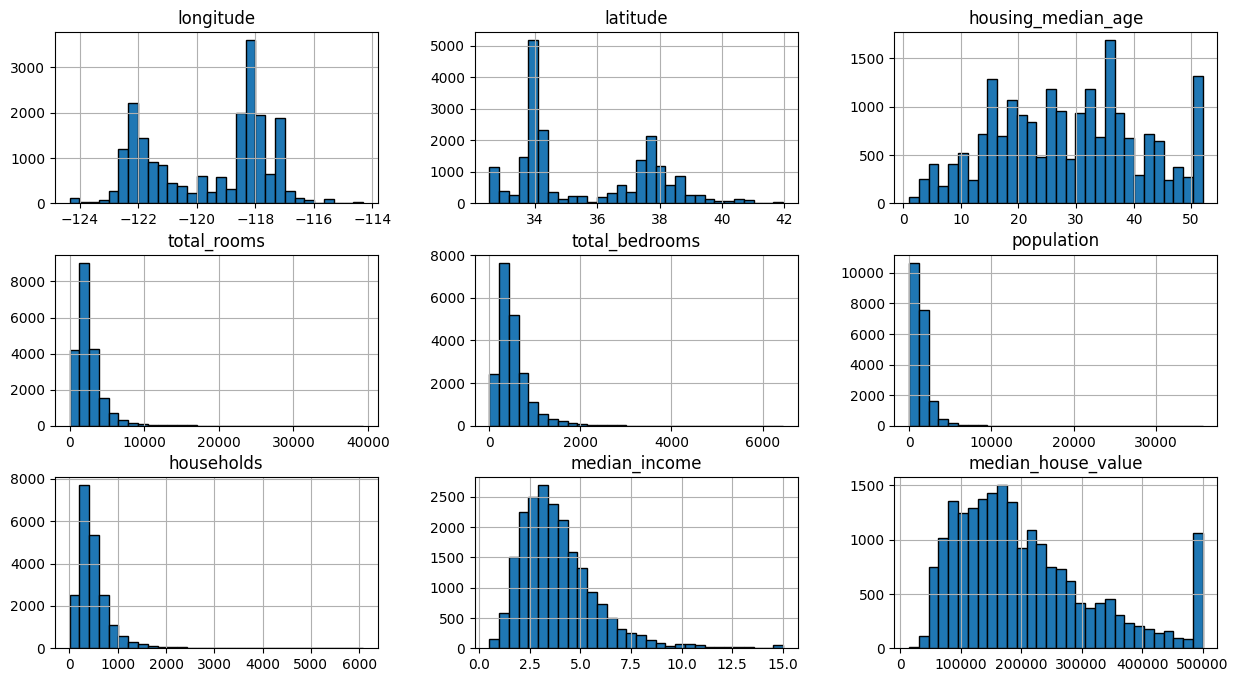

In [3]:
datos.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

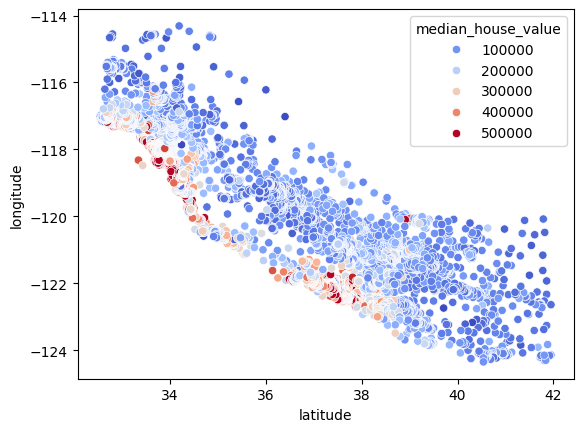

In [4]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_house_value",
               palette="coolwarm")

In [5]:
datos = datos.dropna()

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [9]:
dummies = pd.get_dummies(datos["ocean_proximity"], dtype = int)

In [10]:
datos = datos.join(dummies)

In [11]:
datos = datos.drop(["ocean_proximity"], axis=1)

<Axes: >

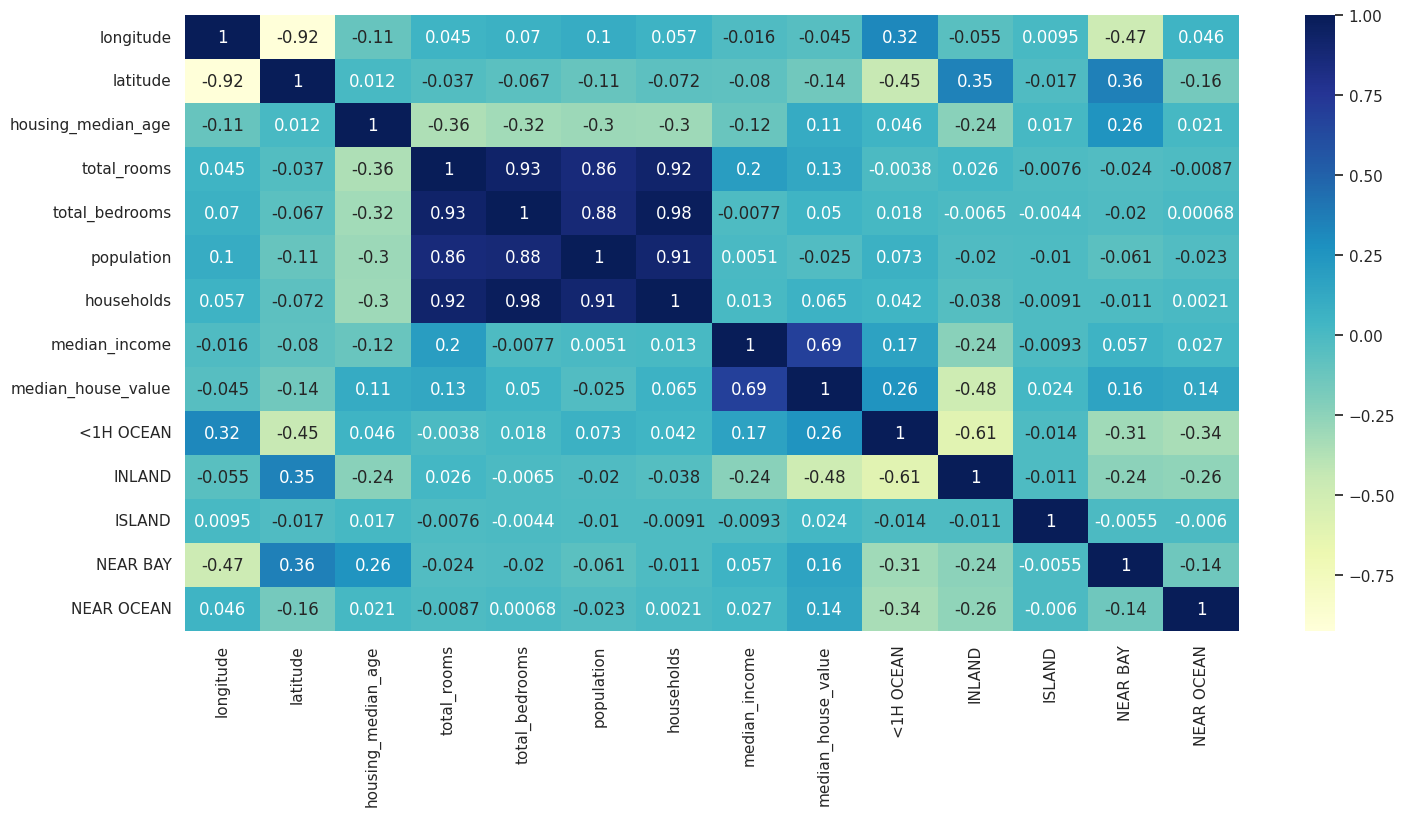

In [12]:
sb.set(rc={'figure.figsize': (17,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [13]:
datos.corr()["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
<1H OCEAN,0.257614
NEAR BAY,0.160526
NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ISLAND,0.023525


<Axes: xlabel='median_house_value', ylabel='median_income'>

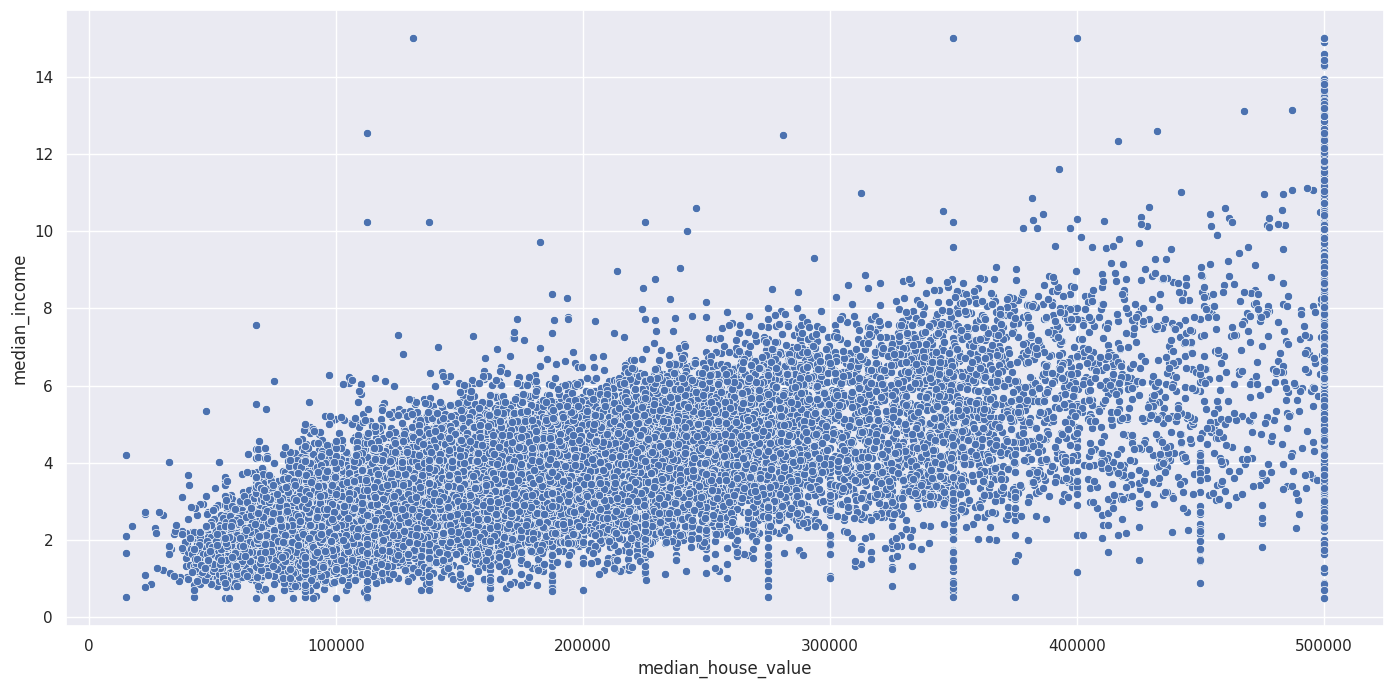

In [14]:
sb.scatterplot(x=datos["median_house_value"], y=datos["median_income"])

In [15]:
datos["bedroom_ratio"] = datos["total_bedrooms"] / datos["total_rooms"]

<Axes: >

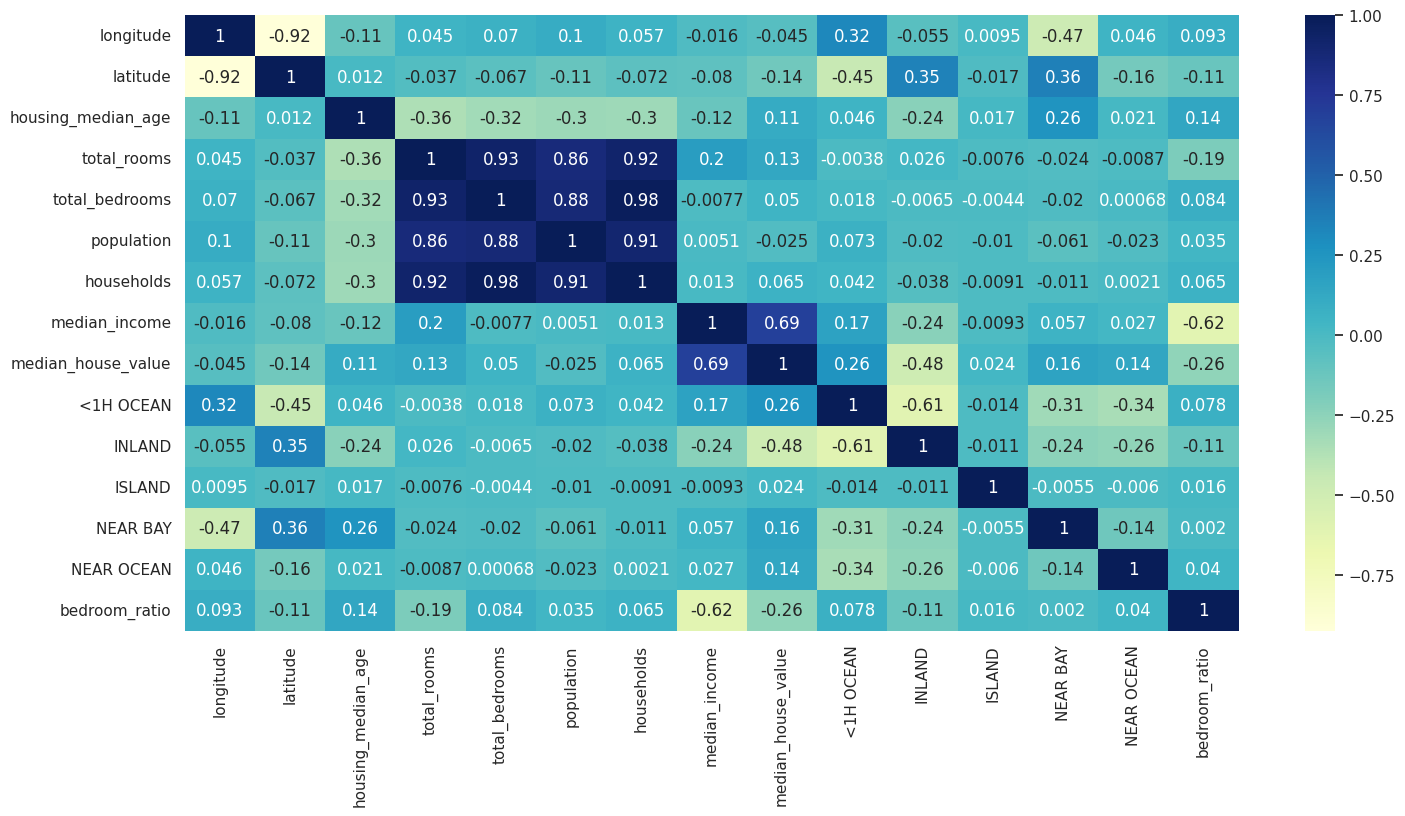

In [16]:
sb.set(rc={'figure.figsize': (17,8)})
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

Separar las características de la etiqueta

In [17]:
X = datos.drop(["median_house_value"], axis=1)
y = datos["median_house_value"]

Separar los datos en 2 partes, conjunto de entrenamiento y otro de pruebas

In [18]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [24]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

In [25]:
modelo.fit(X_ent, y_ent)

LinearRegression()

In [26]:
predicciones = modelo.predict(X_pru)

In [33]:
comparativa = {"Prediccion": predicciones, "Valor Real": y_pru}
pd.DataFrame(comparativa)

,Prediccion,Valor Real
5167,167285.495284,107700.0
5885,235423.980100,244500.0
15664,301751.842664,500001.0
2211,117381.292588,73000.0
5586,279169.000607,268300.0
...,...,...
18578,182624.792700,184300.0
20188,307667.208595,234800.0
13970,136676.211802,92400.0
19370,318283.676998,364800.0


In [35]:
print(modelo.score(X_ent, y_ent))
print(modelo.score(X_pru, y_pru))

0.6508292302749068
0.6561826632796959


In [37]:
#Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_pru, predicciones)

In [38]:
mse

4446321867.081042

In [40]:
rmse = np.sqrt(mse)
rmse

66680.74584976568

In [41]:
#Scalers
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_ent_esc = scaler.fit_transform(X_ent)
X_pru_esc = scaler.transform(X_pru)

In [43]:
pd.DataFrame(X_ent_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.124717,0.563239,-1.157868,0.146395,-0.303061,-0.021301,-0.205062,0.760534,-0.891120,1.478843,-0.017492,-0.356152,-0.387811,-1.290012
1,-0.903632,1.438917,-0.286168,0.568881,0.521204,0.675467,0.725907,-0.864637,-0.891120,1.478843,-0.017492,-0.356152,-0.387811,-0.308427
2,-1.238166,1.228192,0.664778,-0.595773,-0.680069,-0.659348,-0.701578,-0.034740,-0.891120,1.478843,-0.017492,-0.356152,-0.387811,-0.430698
3,-0.449265,0.802060,-1.554096,0.124752,-0.071237,-0.179936,-0.003352,-0.108939,-0.891120,1.478843,-0.017492,-0.356152,-0.387811,-0.667675
4,0.774031,-0.855640,-0.999377,0.134672,-0.347553,-0.046718,-0.189545,2.431659,1.122183,-0.676204,-0.017492,-0.356152,-0.387811,-1.380112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,0.574310,-0.640233,-0.206923,-0.391970,-0.047820,1.007637,-0.047314,-0.935253,1.122183,-0.676204,-0.017492,-0.356152,-0.387811,1.358609
16342,-0.359390,1.115805,-1.316359,0.160824,0.043505,-0.007278,-0.044728,-0.425816,-0.891120,1.478843,-0.017492,-0.356152,-0.387811,-0.466560
16343,0.544351,-0.747937,0.823269,-0.508300,-0.328820,-0.314031,-0.329191,-0.196735,1.122183,-0.676204,-0.017492,-0.356152,-0.387811,0.852211
16344,1.153503,-1.192800,-1.316359,1.092366,0.638287,0.460740,0.552643,0.795526,-0.891120,-0.676204,-0.017492,-0.356152,2.578573,-0.908445
